<a href="https://colab.research.google.com/github/ara114/Anomaly-detection-CS-/blob/main/NSL_KDD(further%20work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File paths for train and test datasets in Google Drive
train_dataset_path = '/content/drive/MyDrive/Machine-Learning(datasets)/NSL-KDD/NSL_KDD_Train.csv'
test_dataset_path = '/content/drive/MyDrive/Machine-Learning(datasets)/NSL-KDD/NSL_KDD_Test.csv'

# Load the train dataset using Pandas
train_df = pd.read_csv(train_dataset_path)

# Load the test dataset using Pandas
test_df = pd.read_csv(test_dataset_path)

# Verify the train dataset
print("Train Dataset:")
print(train_df.head())

# Verify the test dataset
print("\nTest Dataset:")
print(test_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Dataset:
   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...   25  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...    1  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...   26  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  255  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  255  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...   19  0.07  0.07   

   0.17.1  0.25  0.26  0.27  0.05  0.28   normal  
0    0.88  0.00  0.00  0.00   0.0  0.00   normal  
1    0.00  0.00  1.00  1.00   0.0  0.00  neptune  
2    0.03  0.04  0.03  0.01   0.0  0.01   normal  
3    0.00  0.00  0.00  0.00   0.0  0.00   normal  
4    0.00  0.00  0.00  0.00   1.0  1.00  neptune  

[5 rows x 42 columns]

Test Dataset:
   0   tcp   private   REJ    0

In [2]:
columns = ['duration', 'protocol_type', 'service', 'flag',
           'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in',
           'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'class']
train_df.columns = columns
test_df.columns = columns

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
train_df['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [4]:
train_df['class'] = (train_df['class'] != "normal") * 1.0
test_df['class'] = (test_df['class'] != "normal") * 1.0

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1.0


In [5]:
categorical = ['protocol_type', 'service', 'flag']

for cat in categorical:
    print(cat, "train:", train_df[cat].unique(),"\n\n", cat, "test:", test_df[cat].unique(),
          "\n\n============================================\n")

protocol_type train: ['udp' 'tcp' 'icmp'] 

 protocol_type test: ['tcp' 'icmp' 'udp'] 


service train: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 

 service test: ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_p

In [6]:
whole = pd.concat([test_df.assign(ind="test"), train_df.assign(ind="train")])

for col in categorical:
    one_hot = pd.get_dummies(whole[col], drop_first=True)
    whole = whole.drop(columns=[col])
    whole = pd.concat([whole, one_hot],axis=1)


test_df, train_df = whole[whole["ind"].eq("test")].drop(columns="ind"),\
whole[whole["ind"].eq("train")].drop(columns="ind")

In [7]:
y_train, y_test = train_df['class'], test_df['class']
X_train, X_test = train_df.drop(columns=['class']), test_df.drop(columns=['class'])

In [8]:
from sklearn.decomposition import FastICA

# Define the number of components to extract
n_components = 10  # Adjust the number of components as per your requirement

# Initialize the FastICA transformer
ica = FastICA(n_components=n_components)

# Fit FastICA on the training data
X_train_ica = ica.fit_transform(X_train)

# Apply FastICA on the test data
X_test_ica = ica.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


An alternative for the fastica extraction method

In [9]:
from sklearn.decomposition import PCA

# Define the number of components to keep
n_components = 10  # Adjust the number of components as per your requirement

# Initialize the PCA transformer
pca = PCA(n_components=n_components)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Apply PCA on the test data
X_test_pca = pca.transform(X_test)



Another feature extraction method which is sufficient for the dataset

In [10]:
from sklearn.random_projection import GaussianRandomProjection

# Define the number of components to extract
n_components = 10  # Adjust the number of components as per your requirement

# Initialize the Random Projection transformer
rp = GaussianRandomProjection(n_components=n_components)

# Fit Random Projection on the training data
X_train_rp = rp.fit_transform(X_train)

# Apply Random Projection on the test data
X_test_rp = rp.transform(X_test)

IsolationForst Model performed on PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Define the number of components to keep
n_components = 10  # Adjust the number of components as per your requirement

# Initialize the PCA transformer
pca = PCA(n_components=n_components)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Apply PCA on the test data
X_test_pca = pca.transform(X_test)

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as per your requirement

# Train the model using the PCA-transformed features
model.fit(X_train_pca)

# Continue with the remaining steps specific to your anomaly detection workflow, such as evaluation and anomaly detection on test data


IsolationForest(contamination=0.1)

Another model (localoutlierFactor)

In [12]:
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# Define the number of components to keep
n_components = 10  # Adjust the number of components as per your requirement

# Initialize the PCA transformer
pca = PCA(n_components=n_components)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Apply PCA on the test data
X_test_pca = pca.transform(X_test)

# Initialize the LOF model
model = LocalOutlierFactor(contamination=0.1)  # Adjust the contamination parameter as per your requirement

# Train the model using the PCA-transformed features
model.fit(X_train_pca)

# Continue with the remaining steps specific to your anomaly detection workflow, such as evaluation and anomaly detection on test data


LocalOutlierFactor(contamination=0.1)

isolationforst model using GRP (guassian random Projection)

In [13]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import IsolationForest

# Define the number of components for Gaussian Random Projection
n_components = 10  # Adjust the number of components as per your requirement

# Initialize the Gaussian Random Projection transformer
grp = GaussianRandomProjection(n_components=n_components)

# Fit GRP on the training data
X_train_grp = grp.fit_transform(X_train)

# Apply GRP on the test data
X_test_grp = grp.transform(X_test)

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as per your requirement

# Train the model using the GRP-transformed features
model.fit(X_train_grp)

# Continue with the remaining steps specific to your anomaly detection workflow, such as evaluation and anomaly detection on test data


IsolationForest(contamination=0.1)

Model Evaluation on isolation Forest

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as per your requirement

# Train the model
model.fit(X_train)

# Perform anomaly detection on the test data
y_pred = model.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
y_pred_binary = [1 if label == 1 else -1 for label in y_pred]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00      9711
         1.0       0.50      0.70      0.58     12832

    accuracy                           0.40     22543
   macro avg       0.17      0.23      0.19     22543
weighted avg       0.28      0.40      0.33     22543

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[[   0    0    0]
 [ 576    0 9135]
 [3810    0 9022]]


Model training on GRP


In [15]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Initialize and fit the Gaussian Random Projection
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_train_grp = grp.fit_transform(X_train)        #transform the training and test data using the fitted GRP to obtain X_train_grp and X_test_grp.
X_test_grp = grp.transform(X_test)

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_grp)              #The model is then used to perform anomaly detection on the test data (X_test_grp), resulting in the predictions stored in y_pred.

# Perform anomaly detection on the test data using Gaussian Random Projection
y_pred = model.predict(X_test_grp)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
y_pred_binary = [1 if label == 1 else -1 for label in y_pred]

# Evaluate the model
print(classification_report(y_test, y_pred_binary)) #We then use the classification_report function to evaluate the model's performance by comparing the predicted labels (y_pred_binary) with the true labels (y_test).


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00      9711
         1.0       0.58      0.88      0.70     12832

    accuracy                           0.50     22543
   macro avg       0.19      0.29      0.23     22543
weighted avg       0.33      0.50      0.40     22543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [18]:
from sklearn.random_projection import GaussianRandomProjection

# Initialize and fit the Gaussian Random Projection
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_train_grp = grp.fit_transform(X_train)
X_test_grp = grp.transform(X_test)


In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_grp)

# Perform anomaly detection on the test data
y_pred = model.predict(X_test_grp)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
y_pred_binary = [1 if label == 1 else -1 for label in y_pred]

# Evaluate the model
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00      9711
         1.0       0.58      0.88      0.70     12832

    accuracy                           0.50     22543
   macro avg       0.19      0.29      0.23     22543
weighted avg       0.33      0.50      0.40     22543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Anomaly Interpretation and Investigation:

In [20]:
import pandas as pd

# Combine the original features with the predicted labels
anomalies_df = pd.concat([X_test.reset_index(drop=True), pd.Series(y_pred_binary, name='Anomaly')], axis=1)   #The Anomaly column contains the binary labels, where -1 represents an anomaly.

# Subset the dataframe to get only the detected anomalies
detected_anomalies = anomalies_df[anomalies_df['Anomaly'] == -1]      #then subset the anomalies_df dataframe to get only the rows where anomalies were detected, storing them in the detected_anomalies dataframe.

# Explore the characteristics and patterns of the detected anomalies
print("Detected Anomalies:")
print(detected_anomalies.head())



Detected Anomalies:
    duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
1          2      12983          0     0               0       0    0   
4          0        267      14515     0               0       0    0   
13        37        773     364200     0               0       0    0   
25         0        294       6442     0               0       0    0   
29       805      76944          1     0               0       0    0   

    num_failed_logins  logged_in  num_compromised  ...  RSTO  RSTOS0  RSTR  \
1                   0          0                0  ...     0       0     0   
4                   0          1                0  ...     0       0     0   
13                  0          1                0  ...     0       0     0   
25                  0          1                0  ...     0       0     0   
29                  0          1                0  ...     0       0     1   

    S0  S1  S2  S3  SF  SH  Anomaly  
1    0   0   0   0   1   0       -

 adjust the threshold or contamination parameter in the Isolation Forest model.

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_fscore_support

# Initialize the Isolation Forest model with a higher contamination rate
model_adjusted = IsolationForest(contamination=0.2, random_state=42)
model_adjusted.fit(X_train)

# Perform anomaly detection on the test data
y_pred_adjusted = model_adjusted.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
y_pred_binary_adjusted = [1 if label == 1 else -1 for label in y_pred_adjusted]

# Evaluate the adjusted model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_binary_adjusted, average='macro')

# Print the evaluation metrics
print("Adjusted Model Performance:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Adjusted Model Performance:
Precision: 0.1246
Recall: 0.1391
F1-score: 0.1314


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


visualizing the results of anomaly detection

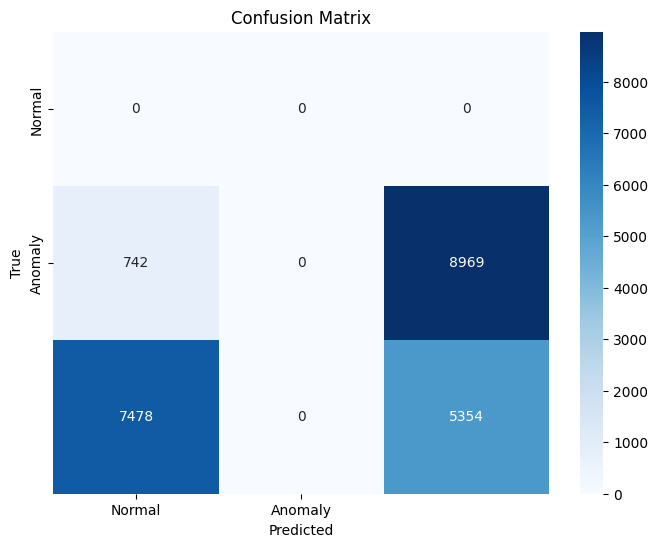

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary_adjusted)

# Define class labels
class_labels = ['Normal', 'Anomaly']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


adjusting the threshold for classifying instances as anomalies or normal based on the anomaly score. This step allows you to fine-tune the trade-off between precision and recall.

In [29]:
import pandas as pd

# Combine the original features with the predicted labels
anomalies_df = pd.concat([X_test.reset_index(drop=True), pd.Series(y_pred_binary, name='Anomaly')], axis=1)

# Subset the dataframe to get only the detected anomalies
detected_anomalies = anomalies_df[anomalies_df['Anomaly'] == -1]

# Explore the characteristics and patterns of the detected anomalies
print("Detected Anomalies:")
print(detected_anomalies.head())

# Calculate summary statistics of the detected anomalies
summary_stats = detected_anomalies.describe()
print("\nSummary Statistics of Detected Anomalies:")
print(summary_stats)

# Perform further analysis or investigation on the detected anomalies
# ... your code here ...


Detected Anomalies:
    duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
1          2      12983          0     0               0       0    0   
4          0        267      14515     0               0       0    0   
13        37        773     364200     0               0       0    0   
25         0        294       6442     0               0       0    0   
29       805      76944          1     0               0       0    0   

    num_failed_logins  logged_in  num_compromised  ...  RSTO  RSTOS0  RSTR  \
1                   0          0                0  ...     0       0     0   
4                   0          1                0  ...     0       0     0   
13                  0          1                0  ...     0       0     0   
25                  0          1                0  ...     0       0     0   
29                  0          1                0  ...     0       0     1   

    S0  S1  S2  S3  SF  SH  Anomaly  
1    0   0   0   0   1   0       -

Further classification

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming a classification task with target variable 'anomaly_type'
X = data.drop('anomaly_type', axis=1)
y = data['anomaly_type']

# Split the dataset into training and testing sets
# (You can modify this step based on your specific dataset)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


NameError: ignored

In [32]:
import pandas as pd
import seaborn as sns


# Compute the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Generate scatter plots for selected feature pairs
sns.pairplot(data[['feature1', 'feature2', 'feature3']])  # Replace 'feature1', 'feature2', 'feature3' with your desired feature names

# Show the plots
plt.show()


NameError: ignored